## Importing the Dependencies

In [108]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2


from PIL import Image

from sklearn.model_selection import train_test_split

In [109]:
with_mask_file=os.listdir('/kaggle/input/face-mask-dataset/data/with_mask')
print(with_mask_file[0:5])
print(with_mask_file[-5:])

['with_mask_3326.jpg', 'with_mask_3139.jpg', 'with_mask_696.jpg', 'with_mask_2867.jpg', 'with_mask_39.jpg']
['with_mask_502.jpg', 'with_mask_110.jpg', 'with_mask_3205.jpg', 'with_mask_1863.jpg', 'with_mask_2020.jpg']


In [110]:
without_mask_file=os.listdir('/kaggle/input/face-mask-dataset/data/without_mask')
print(without_mask_file[0:5])
print(without_mask_file[-5:])

['without_mask_3248.jpg', 'without_mask_2803.jpg', 'without_mask_650.jpg', 'without_mask_2060.jpg', 'without_mask_559.jpg']
['without_mask_3215.jpg', 'without_mask_2934.jpg', 'without_mask_2572.jpg', 'without_mask_1906.jpg', 'without_mask_2551.jpg']


In [111]:
print('The number of mask images: ', len(with_mask_file))
print('The number of unmasked images: ', len(without_mask_file))

The number of mask images:  3725
The number of unmasked images:  3828


### Creating labels

- 0 --> without mask
- 1 --> mask

In [114]:
with_mask_labels=[1]*3725
without_mask_labels=[0]*3828

In [115]:
print('With Mask labels: ', with_mask_labels[0:5])
print('Without Mask labels: ', without_mask_labels[0:5])

With Mask labels:  [1, 1, 1, 1, 1]
Without Mask labels:  [0, 0, 0, 0, 0]


In [116]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


#### Combining both into a single column name labels

In [117]:
labels=with_mask_labels+without_mask_labels

print(len(labels))

print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


### Displaying the images

Displaying with mask image

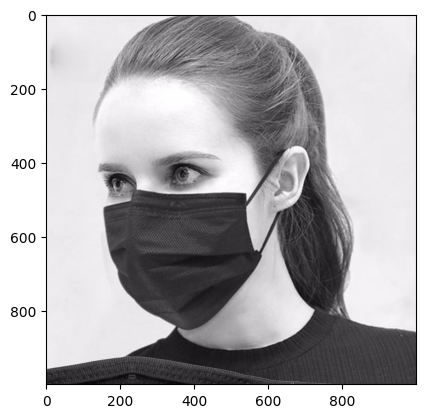

In [118]:
# Reads the image from an numpy array
img=mpimg.imread('/kaggle/input/face-mask-dataset/data/with_mask/with_mask_3149.jpg')

plt.imshow(img)
plt.show()

Displaying without mask image

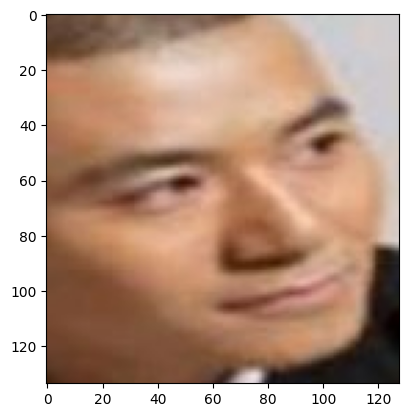

In [119]:
# Reads the image from an numpy array
img=mpimg.imread('/kaggle/input/face-mask-dataset/data/without_mask/without_mask_7.jpg')

plt.imshow(img)
plt.show()

## Image Processing

1. Resize the Images

2. Convert the images to numpy arrays

In [120]:
# Convert images to numpy array

with_mask_path=('/kaggle/input/face-mask-dataset/data/with_mask/') # last forward slash is mandatory
data=[]

for img_file in with_mask_file:
    image=Image.open(with_mask_path + img_file) # Image is from Pillow library
    image=image.resize((128,128))
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)


without_mask_path=('/kaggle/input/face-mask-dataset/data/without_mask/')

for img_file in without_mask_file:
    image=Image.open(without_mask_path + img_file)
    image=image.resize((128,128))
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [121]:
type(data)

list

In [122]:
len(data)

7553

In [123]:
# Checking the first image
data[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [254, 254, 254],
        [253, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [252, 253, 254],
        [246, 139, 136],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [212, 175, 154],
        [218, 187, 172],
        [250, 247, 245]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [212, 175, 154],
        [220, 191, 175],
        [252, 250, 248]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [211, 174, 155],
        [219, 194, 180],
        [252, 251, 250]]

In [124]:
type(data[0])

numpy.ndarray

In [125]:
# 3 means RGB
# 128, 128 --> means height and width
data[0].shape

(128, 128, 3)

converting image list and label list to numpy arrays

In [126]:
X=np.array(data)
Y=np.array(labels)

In [127]:
type(X)

numpy.ndarray

In [128]:
type(Y)

numpy.ndarray

In [129]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [130]:
print(Y)

[1 1 1 ... 0 0 0]


## Train Test Split

In [131]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=2)

In [132]:
print(X.shape,X_train.shape,X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


### Scaling the data

In [133]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [134]:
X_train[0]

array([[[48, 48, 60],
        [43, 43, 54],
        [36, 36, 46],
        ...,
        [92, 77, 70],
        [93, 79, 72],
        [94, 81, 73]],

       [[48, 48, 60],
        [43, 43, 55],
        [36, 36, 46],
        ...,
        [92, 77, 70],
        [93, 79, 71],
        [94, 81, 73]],

       [[45, 45, 57],
        [38, 38, 49],
        [31, 31, 41],
        ...,
        [94, 79, 74],
        [93, 78, 72],
        [93, 78, 71]],

       ...,

       [[15, 16, 21],
        [15, 16, 21],
        [16, 17, 22],
        ...,
        [16, 17, 21],
        [17, 18, 22],
        [17, 18, 22]],

       [[14, 15, 20],
        [14, 15, 20],
        [15, 16, 21],
        ...,
        [17, 18, 22],
        [17, 18, 22],
        [17, 18, 22]],

       [[14, 15, 20],
        [14, 15, 20],
        [15, 16, 21],
        ...,
        [18, 19, 23],
        [19, 20, 24],
        [19, 20, 24]]], dtype=uint8)

In [135]:
X_train_scaled[0]

array([[[0.18823529, 0.18823529, 0.23529412],
        [0.16862745, 0.16862745, 0.21176471],
        [0.14117647, 0.14117647, 0.18039216],
        ...,
        [0.36078431, 0.30196078, 0.2745098 ],
        [0.36470588, 0.30980392, 0.28235294],
        [0.36862745, 0.31764706, 0.28627451]],

       [[0.18823529, 0.18823529, 0.23529412],
        [0.16862745, 0.16862745, 0.21568627],
        [0.14117647, 0.14117647, 0.18039216],
        ...,
        [0.36078431, 0.30196078, 0.2745098 ],
        [0.36470588, 0.30980392, 0.27843137],
        [0.36862745, 0.31764706, 0.28627451]],

       [[0.17647059, 0.17647059, 0.22352941],
        [0.14901961, 0.14901961, 0.19215686],
        [0.12156863, 0.12156863, 0.16078431],
        ...,
        [0.36862745, 0.30980392, 0.29019608],
        [0.36470588, 0.30588235, 0.28235294],
        [0.36470588, 0.30588235, 0.27843137]],

       ...,

       [[0.05882353, 0.0627451 , 0.08235294],
        [0.05882353, 0.0627451 , 0.08235294],
        [0.0627451 , 0

## Building a Convolutional Neural Networks (CNN)

keras always need for both tensorflow and pytorch for backend.

- *Convolutional layers* and *max pooling layers* are often used together in neural networks for image processing tasks.

1. **Convolutional layers** are used to extract features from the image.

2. **Max pooling layers** are used to reduce the dimensionality of the features.

- This process allows the neural network to learn more complex features from the image, and to do so more efficiently.

In [136]:
import tensorflow as tf
from tensorflow import keras

**You have to maintain one thing about it that**
- Started higher neurons and then reduce the neurons in the next Dense layers.

### Setting up the architecture

In [137]:
# number of output labels
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

## Compiling the neural Network

In [140]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc']) # acc means accuracy

### Training the Neural Network

#### About Validation Split=0.1

- **It is just to understand of your model is performing on unknown data at each epoch.**
- *So our main goal is that loss value is decreased and accuracy value is increased.*

- and 0.1 means each we reserve 10% of data means
our 90% will be for training purpose and remained 10% will be validation split.

In [141]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 5s 19ms/step - loss: 0.4685 - acc: 0.7949 - val_loss: 0.2292 - val_acc: 0.9058
Epoch 2/5
170/170 [==============================] - 3s 16ms/step - loss: 0.2993 - acc: 0.8790 - val_loss: 0.2072 - val_acc: 0.9240
Epoch 3/5
170/170 [==============================] - 3s 15ms/step - loss: 0.2462 - acc: 0.9023 - val_loss: 0.1917 - val_acc: 0.9289
Epoch 4/5
170/170 [==============================] - 3s 16ms/step - loss: 0.2136 - acc: 0.9108 - val_loss: 0.1577 - val_acc: 0.9455
Epoch 5/5
170/170 [==============================] - 3s 16ms/step - loss: 0.1809 - acc: 0.9281 - val_loss: 0.1859 - val_acc: 0.9273


Trained data accuracy and loss is 0.9091 and  0.2393

### Model evaluation
Test data accuracy and loss

In [142]:
loss,accuracy=model.evaluate(X_test_scaled,Y_test)

48/48 [==============================] - 0s 7ms/step - loss: 0.2302 - acc: 0.9153


## Visualization

#### Loss (true_value-predicted_value)

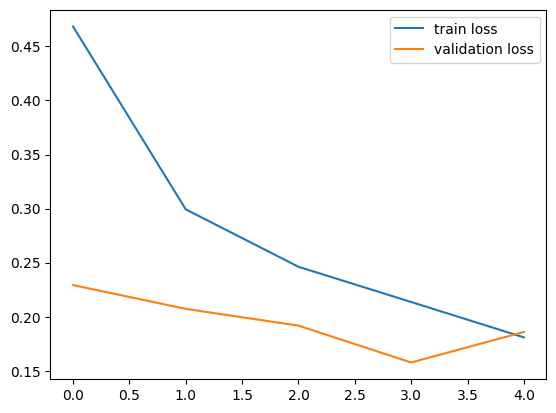

In [143]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')

plt.legend()
plt.show()

#### Accuracy (correct predictions)

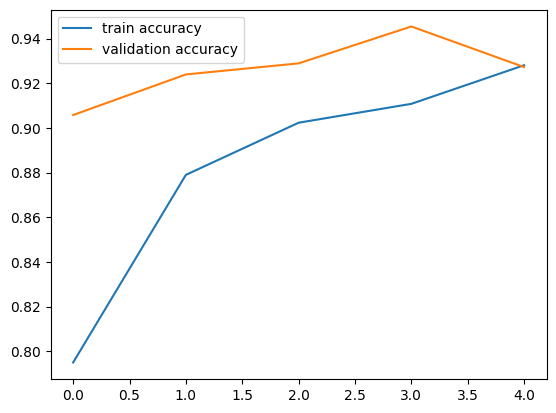

In [144]:
plt.plot(history.history['acc'], label='train accuracy')
plt.plot(history.history['val_acc'], label='validation accuracy')

plt.legend()
plt.show()

### Prediction

In [145]:
y_pred=model.predict(X_test_scaled)

48/48 [==============================] - 0s 5ms/step


Test case 1 -->

In [146]:
np.argmax(y_pred[500])

0

In [147]:
Y_test[500]

0

**Test case 2 --> For the person is wearing mask**

In [148]:
np.argmax(y_pred[400])

1

In [149]:
Y_test[400]

1

# Prediction function

### Test case 1

Not wearing mask

Path of the image to be predicted:  /kaggle/input/image-tester/face_3.jpeg


1/1 [==============================] - 0s 20ms/step
[[0.9599057  0.04018984]]
0
The person in the image is not wearing a mask


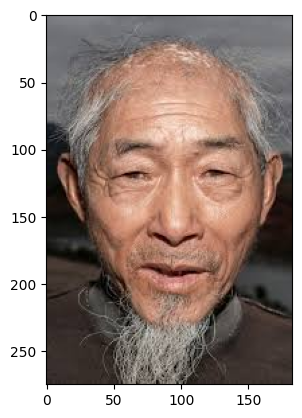

In [153]:
input_image_path = input('Path of the image to be predicted: ')

input_image = mpimg.imread(input_image_path)

plt.imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

### Test case 2

Wearing Mask

Path of the image to be predicted:  /kaggle/input/image-tester/mask_1.jpeg


1/1 [==============================] - 0s 20ms/step
[[0.13387534 0.7740742 ]]
1
The person in the image is wearing a mask


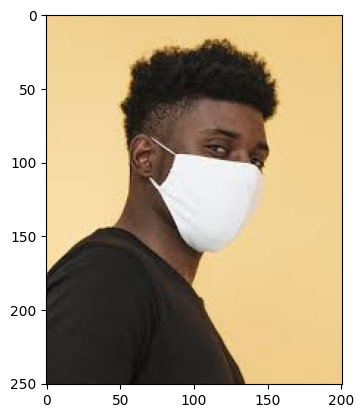

In [158]:
input_image_path = input('Path of the image to be predicted: ')

input_image = mpimg.imread(input_image_path)

plt.imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')